## LASSI vs. DFT vs. DMRG

In [32]:
%load_ext autoreload
%autoreload 2

from tools import bandh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tools.util import load_pkl, LASdata, PeriodicData
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


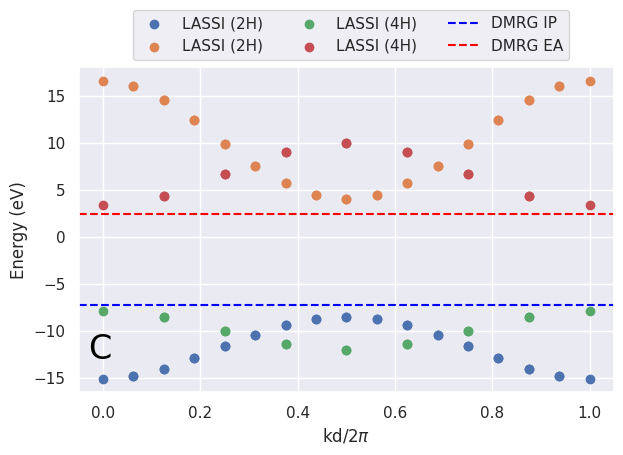

In [33]:
numh = 2
las = LASdata(pkl_fn=f"logs/h32_frag{numh}H_dist14_lsi.pkl",pct_pdft=0)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LASSI ({numh}H)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LASSI ({numh}H)")

numh = 4
las = LASdata(pkl_fn=f"logs/h32_frag{numh}H_dist14_lsi.pkl",pct_pdft=0)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LASSI ({numh}H)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LASSI ({numh}H)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG EA")

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.legend(bbox_to_anchor=(0.93,1.2),ncols=3)
plt.ylim(-16.5,18)
plt.tight_layout()
plt.annotate("C",(-0.03,-13),c="black",size=24)
plt.savefig(f"figures/h32_las_band_structures.png",dpi=500)

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


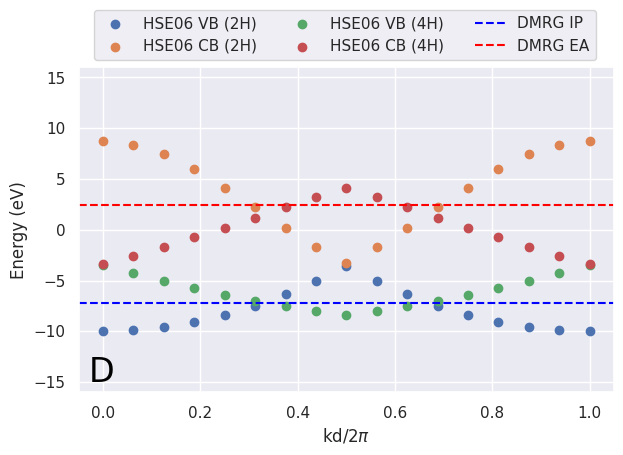

In [34]:
from tools.util import LASdata, DMRGdata, PeriodicData
fnal = "HSE06"
per = PeriodicData(f"logs/periodic_{fnal}_frag2H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (2H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (2H)")

per = PeriodicData(f"logs/periodic_{fnal}_frag4H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (4H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (4H)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG EA")

plt.legend(bbox_to_anchor=(0.98,1.2),ncols=3)
plt.ylim(-16,16)

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.annotate("D",(-0.03,-15),c="black",size=24)
plt.savefig(f"figures/h32_{fnal}_band_structures.png",dpi=500)

## Table & Extrapolations

In [36]:
from tools.util import LASdata, DMRGdata, PeriodicData
import pandas as pd
df = pd.DataFrame()

per = PeriodicData("logs/periodic_PBE_frag2H_14_k16.csv")
df.loc["PBE (2H)","IP"] = per.ip()
df.loc["PBE (2H)","EA"] = per.ea()
per = PeriodicData("logs/periodic_HSE06_frag2H_14_k16.csv")
df.loc["HSE06 (2H)","IP"] = per.ip()
df.loc["HSE06 (2H)","EA"] = per.ea()
per = PeriodicData("logs/periodic_HF_frag2H_14_k16.csv")
df.loc["HF (2H)","IP"] = per.ip()
df.loc["HF (2H)","EA"] = per.ea()
lab = "LASSI"
las = LASdata(pkl_fn="logs/h32_frag2H_dist14_lsi.pkl",pct_pdft=0)
df.loc[f"{lab} (2H)","IP"] = las.ip()
df.loc[f"{lab} (2H)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/h32_frag4H_dist14_lsi.pkl",pct_pdft=0)
df.loc[f"{lab} (4H)","IP"] = las.ip()
df.loc[f"{lab} (4H)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/h32_frag8H_dist14_lsi.pkl",pct_pdft=0)
df.loc[f"{lab} (8H)","IP"] = las.ip()
df.loc[f"{lab} (8H)","EA"] = las.ea()

def extrap(var,eight=False,plot=False):
    import matplotlib.pyplot as plt
    if eight:
        x = np.array([16/2,16/4,16/8]).reshape(-1, 1)
        y = df.loc[[f"{lab} (2H)",f"{lab} (4H)",f"{lab} (8H)"],var]
    else:
        x = np.array([16/2,16/4]).reshape(-1, 1)
        y = df.loc[[f"{lab} (2H)",f"{lab} (4H)"],var]
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x,y)
    m, b = model.coef_, model.intercept_
    if plot:
        plt.scatter(x,y)
        x = np.arange(1,8,0.01)
        y = m*x + b
        plt.plot(x,y)
    return float(m+b)
# df.loc["LASSI Extrap.","IP"] = extrap("IP",eight=False)
df.loc[f"{lab} Extrap","IP"] = extrap("IP",eight=True)
# df.loc["LASSI Extrap.","EA"] = extrap("EA",eight=False)
df.loc[f"{lab} Extrap","EA"] = extrap("EA",eight=True)

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
df.loc["DMRG (32H)","IP"] = dmrg.ip()
df.loc["DMRG (32H)","EA"] = dmrg.ea()
df["GAP"] = df["IP"] - df["EA"]
df = df.T
df = np.round(df,2)
df

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


,PBE (2H),HSE06 (2H),HF (2H),LASSI (2H),LASSI (4H),LASSI (8H),LASSI Extrap,DMRG (32H)
IP,3.44,3.56,4.93,8.52,7.92,7.73,7.57,7.23
EA,3.42,3.32,0.33,-4.00,-3.37,-3.23,-3.04,-2.44
GAP,0.02,0.24,4.60,12.52,11.28,10.96,10.61,9.67


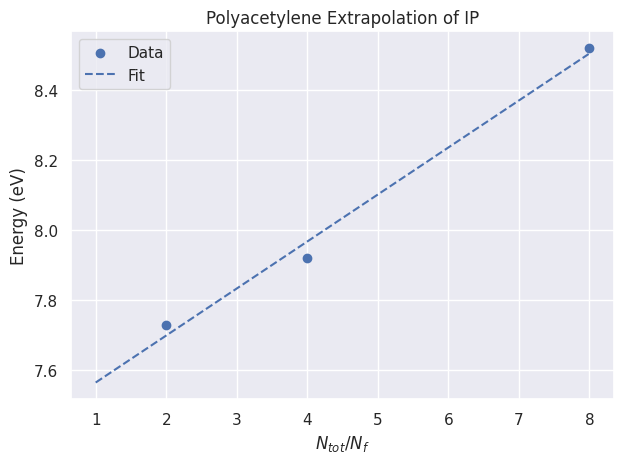

In [39]:
def plotfit(var):
    import matplotlib.pyplot as plt
    x0 = np.array([16/2,16/4,16/8]).reshape(-1, 1)
    y0 = df.loc[var,["LASSI (2H)","LASSI (4H)","LASSI (8H)"]]
    plt.scatter(x0,y0,label="Data")
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x0[:2],y0[:2])
    x = np.arange(1,8,0.01)
    m,b = model.coef_, model.intercept_
    y = m*x + b
    # plt.plot(x,y,label="2 pt. Extrap",linestyle="--")
    model.fit(x0,y0)
    m,b = model.coef_, model.intercept_
    y = m*x + b
    plt.plot(x,y,label="Fit",linestyle="--")
    plt.title(f"Polyacetylene Extrapolation of {var}")
    plt.ylabel("Energy (eV)")
    plt.xlabel("$N_{tot}/N_{f}$")
    plt.legend()
    plt.tight_layout()

plotfit("IP")
plt.savefig("figures/hcircle_ip_extrap.png",dpi=500)

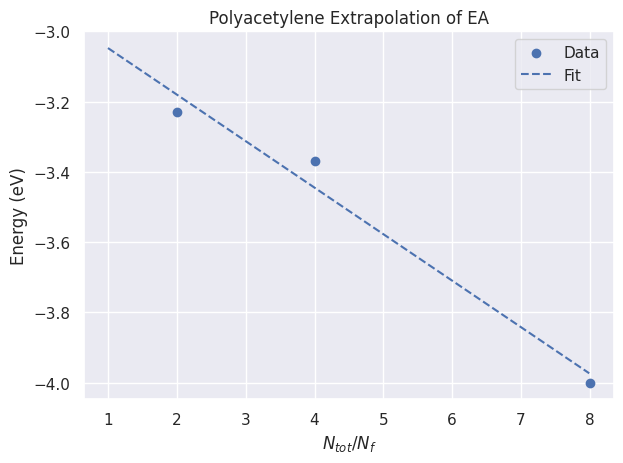

In [40]:
plotfit("EA")
plt.savefig("figures/hcircle_ea_extrap.png",dpi=500)

## Supporting Information

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


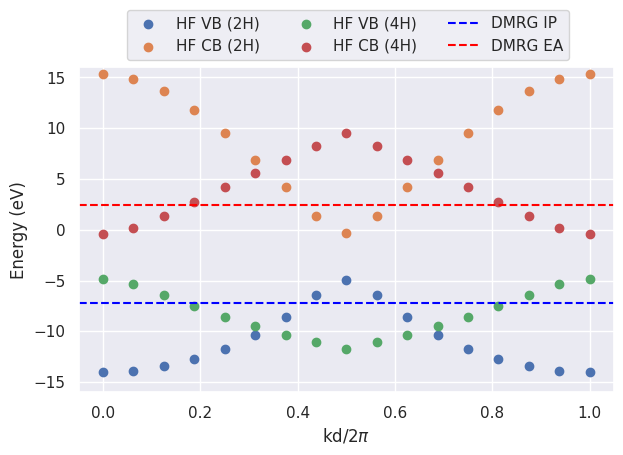

In [6]:
from tools.util import LASdata, DMRGdata, PeriodicData
fnal = "HF"
per = PeriodicData(f"logs/periodic_{fnal}_frag2H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (2H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (2H)")

per = PeriodicData(f"logs/periodic_{fnal}_frag4H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (4H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (4H)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG EA")

plt.legend(bbox_to_anchor=(0.93,1.2),ncols=3)
plt.ylim(-16,16)

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig(f"figures/h32_{fnal}_band_structures.png",dpi=500)

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


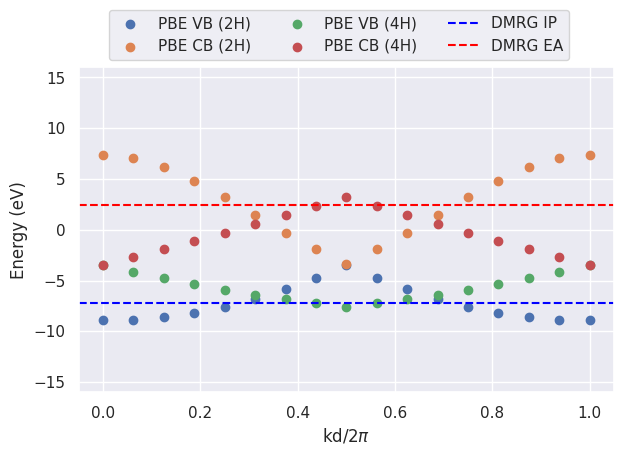

In [7]:
from tools.util import LASdata, DMRGdata, PeriodicData
fnal = "PBE"
per = PeriodicData(f"logs/periodic_{fnal}_frag2H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (2H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (2H)")

per = PeriodicData(f"logs/periodic_{fnal}_frag4H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (4H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (4H)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG EA")

plt.legend(bbox_to_anchor=(0.93,1.2),ncols=3)
plt.ylim(-16,16)

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig(f"figures/h32_{fnal}_band_structures.png",dpi=500)

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


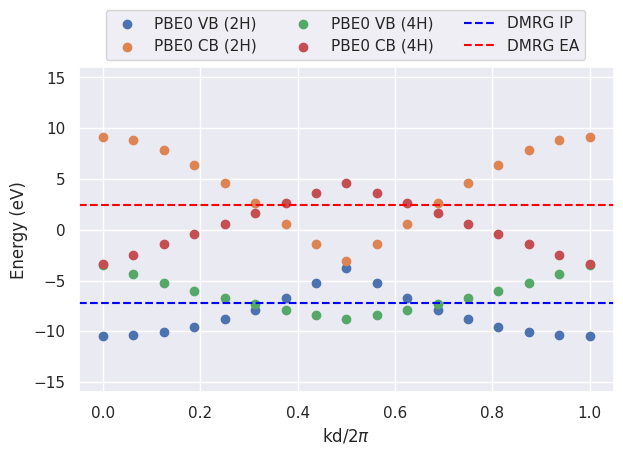

In [14]:
from tools.util import LASdata, DMRGdata, PeriodicData
fnal = "PBE0"
per = PeriodicData(f"logs/periodic_{fnal}_frag2H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (2H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (2H)")

per = PeriodicData(f"logs/periodic_{fnal}_frag4H_14_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (4H)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (4H)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG EA")

plt.legend(bbox_to_anchor=(0.96,1.2),ncols=3)
plt.ylim(-16,16)

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig(f"figures/h32_{fnal}_band_structures.png",dpi=500)

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


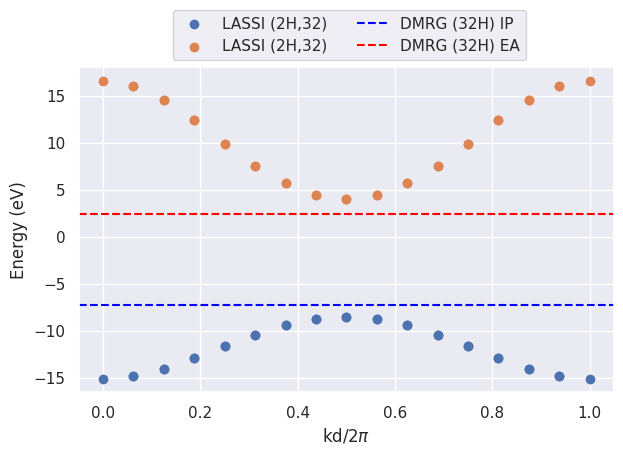

In [22]:
from tools.util import LASdata, DMRGdata, PeriodicData

#Convergence
numh = 2
las = LASdata(pkl_fn=f"logs/h32_frag{numh}H_dist14_lsi.pkl",pct_pdft=0)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LASSI ({numh}H,32)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LASSI ({numh}H,32)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG (32H) IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG (32H) EA")

plt.ylim(-16.5,18)
plt.legend(bbox_to_anchor=(0.85,1.2),ncols=2)
plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig("figures/las32h_bands.png",dpi=500)

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


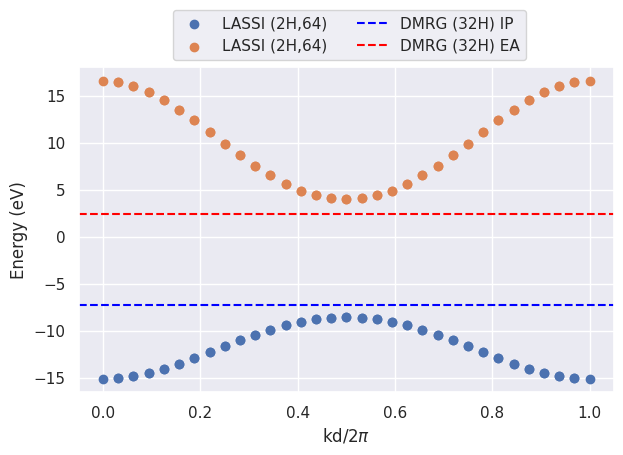

In [24]:
from tools.util import LASdata, DMRGdata, PeriodicData

#Convergence
numh = 2
las = LASdata(pkl_fn=f"logs/hcircle64_frag2_d14.pkl",pct_pdft=0)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LASSI ({numh}H,64)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LASSI ({numh}H,64)")

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
plt.axhline(dmrg.homo,linestyle="--",color="blue",label="DMRG (32H) IP")
plt.axhline(dmrg.lumo,linestyle="--",color="red",label="DMRG (32H) EA")

plt.ylim(-16.5,18)
plt.legend(bbox_to_anchor=(0.85,1.2),ncols=2)
plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig("figures/las64h_bands.png",dpi=500)

In [28]:
lab = "LASSI"
df = pd.DataFrame()
las = LASdata(pkl_fn=f"logs/h32_frag2H_dist14_lsi.pkl",pct_pdft=0)
df.loc[f"{lab} (2H,32)","IP"] = las.ip()
df.loc[f"{lab} (2H,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/hcircle64_frag2_d14.pkl",pct_pdft=0)
df.loc[f"{lab} (2H,64)","IP"] = las.ip()
df.loc[f"{lab} (2H,64)","EA"] = las.ea()

dmrg = DMRGdata("logs/hcircle_dmrg32_d14_m2000.csv",pct_pdft=0)
df.loc["DMRG (32H)","IP"] = dmrg.ip()
df.loc["DMRG (32H)","EA"] = dmrg.ea()
df["GAP"] = df["IP"] - df["EA"]
df = df.T
df = np.round(df,2)
df

 0    3.140000e-16
 1    2.570000e-07
-1    2.670000e-07
Name: dw, dtype: float64


,"LASSI (2H,32)","LASSI (2H,64)",DMRG (32H)
IP,8.52,8.53,7.23
EA,-4.00,-3.96,-2.44
GAP,12.52,12.50,9.67


## Hamiltonian Structure

[-15.39 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96
 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -15.02 -15.02 -15.02
 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02
 -15.02 -15.02 -15.02]


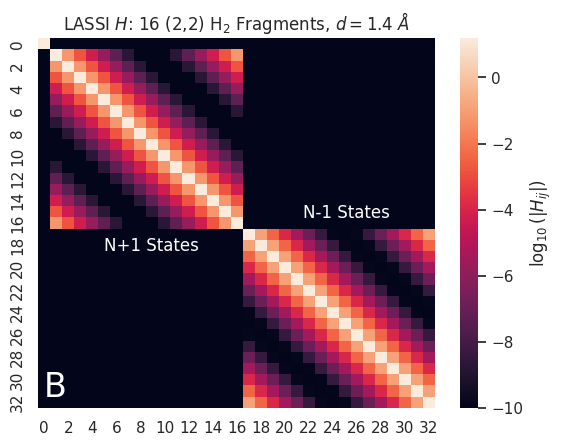

In [45]:
las = LASdata(pkl_fn="logs/h32_frag2H_dist14_lsi.pkl",pct_pdft=0)
las.plot_h()
plt.annotate("B",(0.5,32),c="white",size=24)
plt.annotate("N+1 States",(5.5,19),c="white")
plt.annotate("N-1 States",(22,16),c="white")
plt.title("LASSI $H$: 16 (2,2) H$_2$ Fragments, $d=1.4$ $\AA$")
plt.savefig("figures/h32H.png",dpi=500)

[-15.39 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96
 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -14.96 -15.02 -15.02 -15.02
 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02 -15.02
 -15.02 -15.02 -15.02]


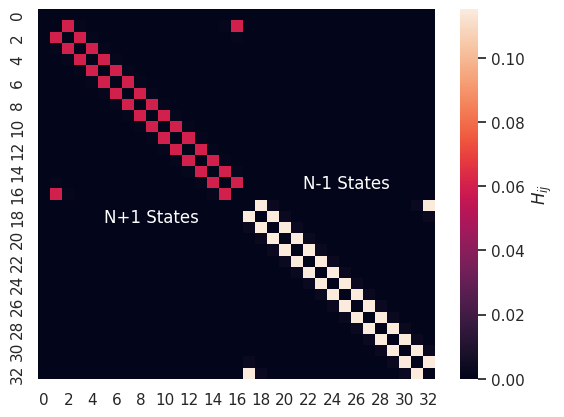

In [20]:
las = LASdata(pkl_fn="logs/h32_frag2H_dist14_lsi.pkl",pct_pdft=0)
las.plot_h(nodiag=True)
plt.annotate("N+1 States",(5.5,19),c="white")
plt.annotate("N-1 States",(22,16),c="white")
plt.savefig("figures/h32H_nodiag.png",dpi=500)